In [14]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
data.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
data.shape

(150, 5)

In [4]:
data.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [5]:
data.variety.nunique()

3

In [6]:
y=data.variety
data.drop("variety",axis=1,inplace=True)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(data)
scaled_data=scaler.transform(data)
x= pd.DataFrame(scaled_data)

<h2>SVM</h2>

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=109) # 70% training and 30% test
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
clf.score(x_test,y_test)

0.9555555555555556

In [9]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9555555555555556

In [65]:
len(y_train)

105

<h2>KNN </h2>

In [66]:
score1=[]
for i in range(1,len(y_train)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    score1.append(model.score(x_test,y_test))


In [67]:
print(score1)

[0.9111111111111111, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9111111111111111, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.8888888888888888, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8, 0.8222222222222222, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8222222222222222, 0.8, 0.8, 0.8, 0.8222222222222222, 0.8222222222222222, 0.7777777777777778, 0.8222222222222222, 0.7777777777777778, 0.7777777777777778, 0.8, 0.8, 0.8, 0.7777777777777778, 0.8, 0.8222222222222222, 0.8222222222222222, 0.7777777777777778, 0.8222222222222222, 0.8222222222222222, 0.8, 0.8, 0.8, 0.7777777

In [68]:
print(max(score1),"at n=",(score1.index(max(score1)))+1)

0.9555555555555556 at n= 6


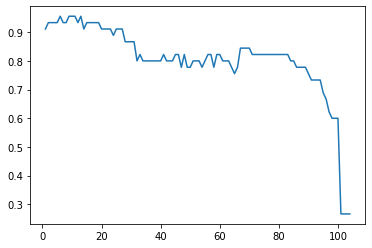

In [69]:
plt.plot(range(1,len(y_train)),score1)